**IMPORT**

In [1]:

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, load_model  
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

******LOOD DATA******

In [2]:
data = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


****Define feature columns and label****

In [3]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_cols]  # Predictors (features)
y = data['Outcome']     # Label (target variable)

**Normalize the features**

In [4]:
X_norm = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


**Split data into training and test sets**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=42)

**One-hot encode labels for training and testing sets**

In [6]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

**Initialize the model**

In [7]:
model = Sequential()

# Define the architecture
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(2, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the model**

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Define early stopping monitor**

In [9]:
early_stopping_monitor = EarlyStopping(patience=10)

**Train the model**

In [10]:
model_training = model.fit(X_train, y_train, validation_split=0.3, epochs=100, 
                           callbacks=[early_stopping_monitor], verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6726 - loss: 0.6696 - val_accuracy: 0.6532 - val_loss: 0.6461
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6491 - loss: 0.6470 - val_accuracy: 0.6532 - val_loss: 0.6130
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6889 - loss: 0.5912 - val_accuracy: 0.7168 - val_loss: 0.5674
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7282 - loss: 0.5714 - val_accuracy: 0.7110 - val_loss: 0.5415
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7497 - loss: 0.5107 - val_accuracy: 0.7225 - val_loss: 0.5284
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7546 - loss: 0.4955 - val_accuracy: 0.6647 - val_loss: 0.6222
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7672 - loss: 0.4640 - val_accuracy: 0.6879 - val_loss: 0.5581
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7478 - loss: 0.4803 - val_accuracy: 0.7168 - 

**Visualize training and validation loss**

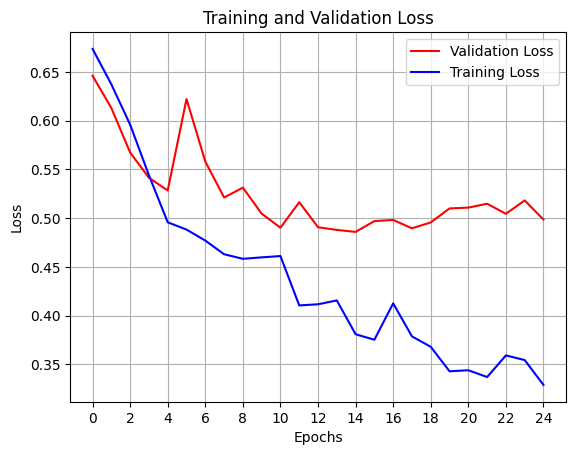

In [11]:
plt.plot(model_training.history['val_loss'], 'r', label='Validation Loss')
plt.plot(model_training.history['loss'], 'b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Adjust the x-axis ticks to show every nth epoch
plt.xticks(np.arange(0, len(model_training.history['loss']), step=2))  # Adjust step as needed

plt.legend()
plt.grid()
plt.show()



**Save the trained model**

In [12]:
model.save('Diabetes_model.h5')

**Load the saved model**

In [13]:
model = load_model('Diabetes_model.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │        10,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 40)             │         2,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            82 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,474 (208.89 KB)

 Trainable params: 53,472 (208.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**Make predictions on the test set**

In [14]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Display the probabilities for class "1" (indicating diabetic)
print(predictions[:, 1])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[0.31966168 0.02816199 0.023107   0.11590105 0.367931   0.5286901
 0.00754167 0.21139957 0.85015213 0.68021584 0.11036277 0.8708256
 0.4701938  0.557141   0.06679849 0.30049437 0.04115602 0.01906837
 0.6369482  0.75362563 0.14620148 0.01816539 0.4847735  0.01436876
 0.5695629  0.9064775  0.05233943 0.00668409 0.01370208 0.09278895
 0.92583597 0.7839237  0.9059682  0.9149205  0.7819974  0.87846184
 0.01199012 0.3610054  0.16395445 0.8780429  0.03195551 0.34603152
 0.4971799  0.27251264 0.00581703 0.8137343  0.04427379 0.07927615
 0.06372193 0.9424209  0.01010517 0.7964341  0.86720484 0.07737637
 0.01844274 0.01115488 0.63889486 0.00330198 0.7475823  0.8207031
 0.8367944  0.647968   0.59862846 0.5188997  0.00559375 0.70064557
 0.02355042 0.6827883  0.0060416  0.7910815  0.81611264 0.0218695
 0.0272589  0.01126537 0.047507   0.60893136 0.30927822 0.02369832
 0.03050002 0.05361495 0.72892934 0.11175743 0.04246044 0.11075709
 0.21361083 0.9169887  0.821